In [2]:
#Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso


In [2]:
df_housing=pd.read_csv(r"C:\Users\SKAN\Downloads\Chennai houseing sale.csv")

In [3]:
df_housing.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df_housing.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.52,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.16,425350,119098,8507000
7108,P09794,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,...,ELO,Paved,I,3.1,3.5,4.3,3.64,349177,79812,9976480


In [5]:
df_housing.shape

(7109, 22)

In [6]:
df_housing.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [7]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# Data Preprocessing

In [8]:
#Checking the duplicate

In [9]:
df_housing.duplicated().sum()

0

In [10]:
#No duplicate value in the columns

In [11]:
#Drop columns "QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL" which are not significant.

In [12]:
df_housing.drop(["QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"],axis=1,inplace=True)

In [13]:
df_housing.isnull().sum().sort_values(ascending=False)

N_BATHROOM       5
N_BEDROOM        1
PRT_ID           0
DATE_BUILD       0
COMMIS           0
REG_FEE          0
MZZONE           0
STREET           0
UTILITY_AVAIL    0
BUILDTYPE        0
PARK_FACIL       0
AREA             0
SALE_COND        0
N_ROOM           0
DIST_MAINROAD    0
DATE_SALE        0
INT_SQFT         0
SALES_PRICE      0
dtype: int64

In [14]:
def missing_check(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.isnull().count().sort_values(ascending=False))
    missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    return missing_data
missing_check(df_housing)

,Total,Percent
N_BATHROOM,5,0.000703
N_BEDROOM,1,0.000141
PRT_ID,0,0.000000
DATE_BUILD,0,0.000000
COMMIS,0,0.000000
REG_FEE,0,0.000000
MZZONE,0,0.000000
STREET,0,0.000000
UTILITY_AVAIL,0,0.000000
BUILDTYPE,0,0.000000


In [15]:
#Null values in columns are less so drop the null values from the columns

In [16]:
df_housing.dropna(inplace=True)

In [17]:
df_housing.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [18]:
#check the unique values for catagorical variables

In [19]:
for col in df_housing.columns:
    if df_housing[col].dtype=='object':
        print()
        print(col)
        print(df_housing[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [20]:
#some value in the columns are misspelled,replace with the correct spelling

In [21]:
df_housing["AREA"].replace(["Ana Nagar","Ann Nagar"],"Anna Nagar",inplace=True)
df_housing["AREA"].replace(["Chrompt","Chrmpet","Chormpet"],"Chrompet",inplace=True)
df_housing["AREA"].replace("KKNagar","KK Nagar",inplace=True)
df_housing["AREA"].replace("TNagar","T Nagar",inplace=True)
df_housing["AREA"].replace("Adyr","Adyar",inplace=True)
df_housing["AREA"].replace("Velchery","Velachery",inplace=True)
df_housing["AREA"].replace("Karapakam","Karapakkam",inplace=True)
df_housing["SALE_COND"].replace("Ab Normal","AbNormal",inplace=True)
df_housing["SALE_COND"].replace(["Partiall","PartiaLl"],"Partial",inplace=True)
df_housing["SALE_COND"].replace("Adj Land","AdjLand",inplace=True)
df_housing["PARK_FACIL"].replace("Noo","No",inplace=True)
df_housing["BUILDTYPE"].replace("Comercial","Commercial",inplace=True)
df_housing["BUILDTYPE"].replace("Other","Others",inplace=True)
df_housing["UTILITY_AVAIL"].replace("NoSewr ","NoSeWa",inplace=True)
df_housing["UTILITY_AVAIL"].replace("AllPub","All Pub",inplace=True)
df_housing["STREET"].replace("NoAccess","No Access",inplace=True)
df_housing["STREET"].replace("Pavd","Paved",inplace=True)


In [22]:
for col in df_housing.columns:
    if df_housing[col].dtype=='object':
        print()
        print(col)
        print(df_housing[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']

PARK_FACIL
['Yes' 'No']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'House']

UTILITY_AVAIL
['All Pub' 'ELO' 'NoSeWa']

STREET
['Paved' 'Gravel' 'No Access']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [23]:
df_housing.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,All Pub,Paved,A,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,All Pub,Gravel,RH,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSeWa,Paved,I,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,All Pub,Gravel,C,237000,74063,7406250


In [24]:
#Add the varibles "REG_FEE","COMMIS","SALES_PRICE" to get the total price 

In [25]:
df_housing["TOTAL_PRICE"]=df_housing["REG_FEE"]+df_housing["COMMIS"]+df_housing["SALES_PRICE"]

In [26]:
df_housing

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,TOTAL_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,All Pub,Paved,A,380000,144400,7600000,8124400
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,All Pub,Gravel,RH,760122,304049,21717770,22781941
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,421094,92114,13159200,13672408
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSeWa,Paved,I,356321,77042,9630290,10063653
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,All Pub,Gravel,C,237000,74063,7406250,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,208767,107060,5353000,5668827
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,346191,205551,10818480,11370222
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,317354,167028,8351410,8835792
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,425350,119098,8507000,9051448


In [27]:
#convert columns "DATE_SALE","DATE_BUILD" object datatypes into Datetime

In [28]:
df_housing["DATE_SALE"]=pd.to_datetime(df_housing["DATE_SALE"])
df_housing["DATE_BUILD"]=pd.to_datetime(df_housing["DATE_BUILD"])

In [29]:
df_housing.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
TOTAL_PRICE               int64
dtype: object

In [30]:
#To get the Age of the house subtract column "DATE_BUILD" from column "DATE_SAlE"

In [31]:
df_housing["AGE"]=pd.DatetimeIndex(df_housing["DATE_SALE"]).year-pd.DatetimeIndex(df_housing["DATE_BUILD"]).year

In [32]:
df_housing

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,TOTAL_PRICE,AGE
0,P03210,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,All Pub,Paved,A,380000,144400,7600000,8124400,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,760122,304049,21717770,22781941,11
2,P01812,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,421094,92114,13159200,13672408,20
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSeWa,Paved,I,356321,77042,9630290,10063653,22
4,P06210,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,All Pub,Gravel,C,237000,74063,7406250,7717313,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011-03-01,51,1.0,1.0,2,AdjLand,No,1962-01-15,Others,ELO,No Access,RM,208767,107060,5353000,5668827,49
7105,P10000,Velachery,1897,2004-08-04,52,3.0,2.0,5,Family,Yes,1995-11-04,Others,NoSeWa,No Access,RH,346191,205551,10818480,11370222,9
7106,P09594,Velachery,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,No,1978-01-09,House,NoSeWa,Gravel,I,317354,167028,8351410,8835792,28
7107,P06508,Karapakkam,787,2009-03-08,40,1.0,1.0,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,425350,119098,8507000,9051448,32


In [33]:
#Dropping the columns "DATE_SALE","DATE_BUILD","REG_FEE","COMMIS","SALES_PRICE"

In [34]:
df_housing.drop(["DATE_SALE","DATE_BUILD","REG_FEE","COMMIS","SALES_PRICE"],axis=1,inplace=True)

In [35]:
df_housing

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,TOTAL_PRICE,AGE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,All Pub,Paved,A,8124400,44
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,All Pub,Gravel,RH,22781941,11
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13672408,20
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSeWa,Paved,I,10063653,22
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,All Pub,Gravel,C,7717313,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,5668827,49
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,11370222,9
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,8835792,28
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,9051448,32


In [36]:
df_housing["N_BATHROOM"]=df_housing["N_BATHROOM"].astype('int64')
df_housing["N_ROOM"]=df_housing["N_ROOM"].astype('int64')
df_housing["N_BEDROOM"]=df_housing["N_BEDROOM"].astype('int64')

In [37]:
df_housing.dtypes

PRT_ID           object
AREA             object
INT_SQFT          int64
DIST_MAINROAD     int64
N_BEDROOM         int64
N_BATHROOM        int64
N_ROOM            int64
SALE_COND        object
PARK_FACIL       object
BUILDTYPE        object
UTILITY_AVAIL    object
STREET           object
MZZONE           object
TOTAL_PRICE       int64
AGE               int64
dtype: object

In [38]:
df_housing.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,TOTAL_PRICE,AGE
count,7103.000000,7103.000000,7103.000000,7103.00000,7103.000000,7.103000e+03,7103.000000
mean,1382.117556,99.578629,1.637336,1.21329,3.688723,1.141278e+07,24.271153
std,457.484517,57.399230,0.803030,0.40966,1.019299,3.945930e+06,12.334273
min,500.000000,0.000000,1.000000,1.00000,2.000000,2.253935e+06,3.000000
25%,993.000000,50.000000,1.000000,1.00000,3.000000,8.645484e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.00000,4.000000,1.081952e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.00000,4.000000,1.361495e+07,34.000000
max,2500.000000,200.000000,4.000000,2.00000,6.000000,2.496904e+07,55.000000


# Plot the histograms and boxplots of the the variables

In [39]:
df_housing.dtypes

PRT_ID           object
AREA             object
INT_SQFT          int64
DIST_MAINROAD     int64
N_BEDROOM         int64
N_BATHROOM        int64
N_ROOM            int64
SALE_COND        object
PARK_FACIL       object
BUILDTYPE        object
UTILITY_AVAIL    object
STREET           object
MZZONE           object
TOTAL_PRICE       int64
AGE               int64
dtype: object

In [40]:
#Univariate Analysis

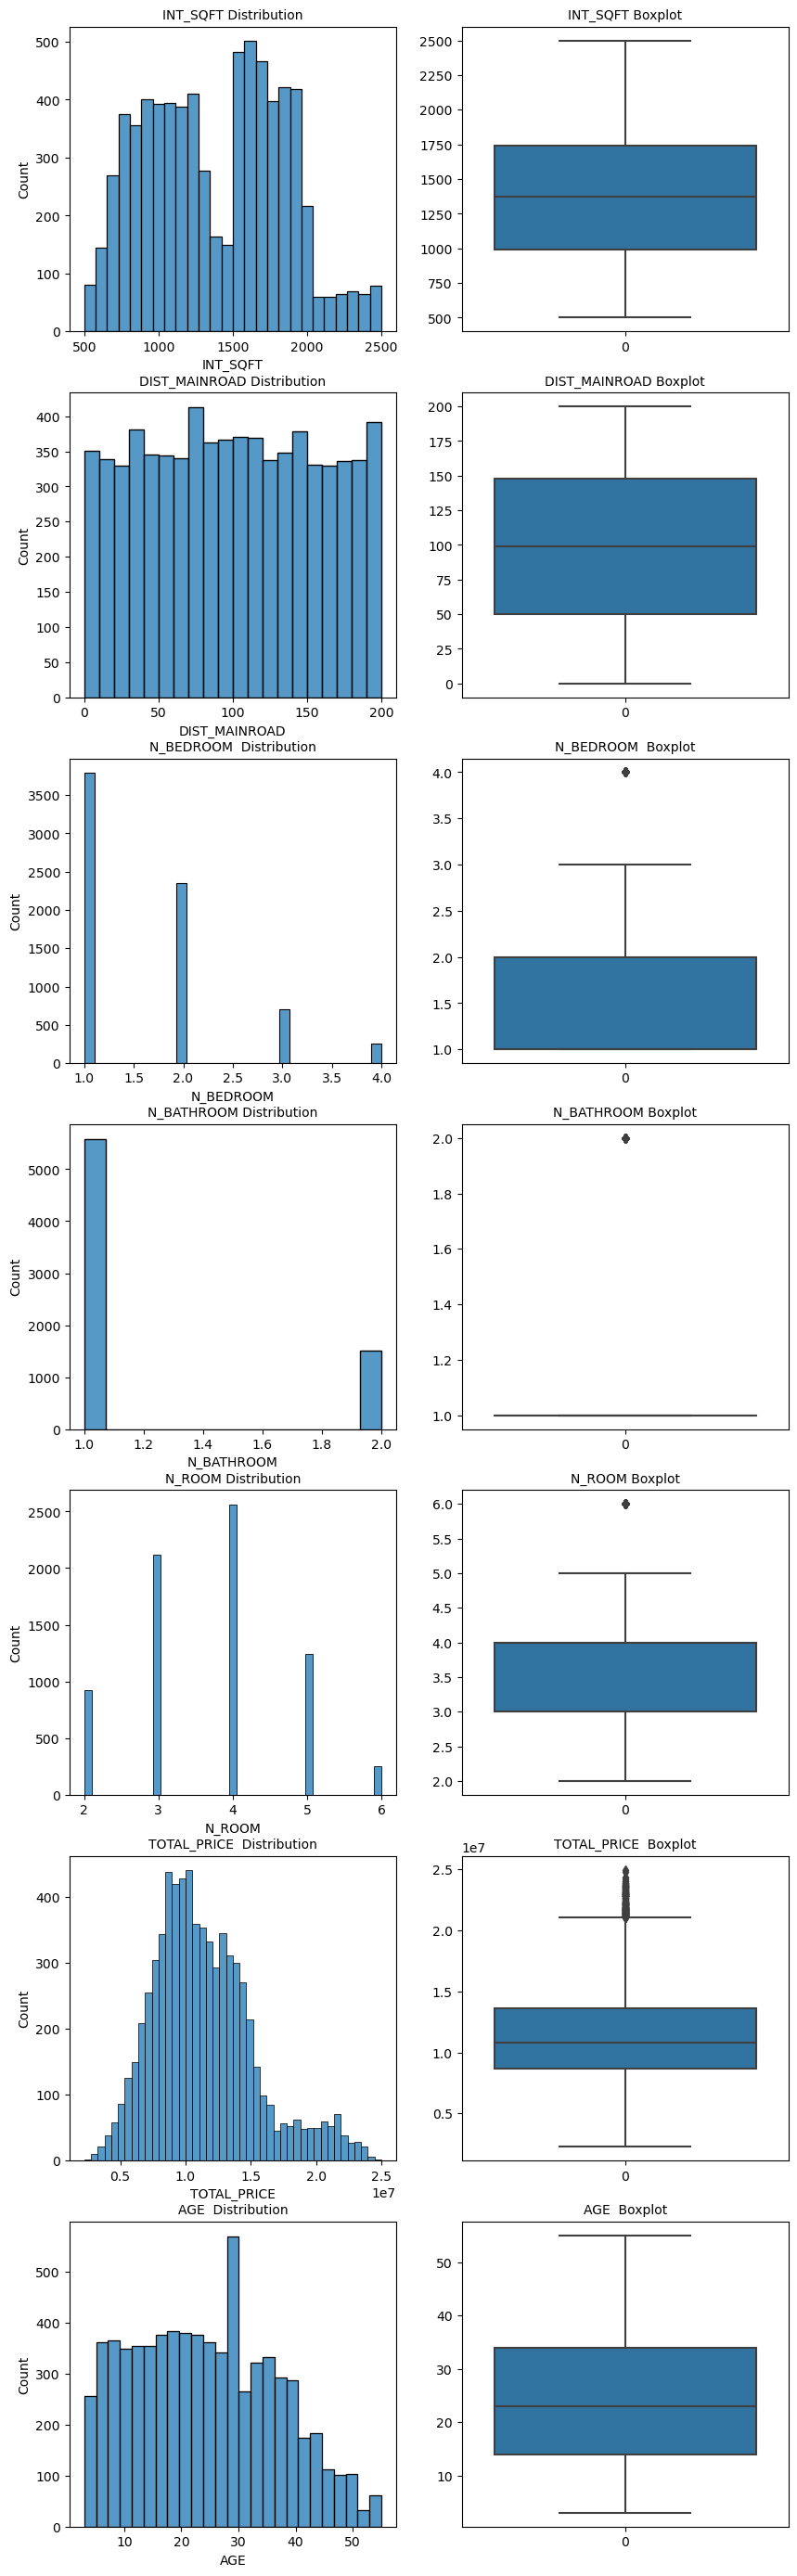

In [41]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(10,35)
a = sns.histplot(df_housing['INT_SQFT'] , ax=axes[0][0])
a.set_title("INT_SQFT Distribution",fontsize=10)

a = sns.boxplot(df_housing['INT_SQFT'] , orient = "v" , ax=axes[0][1])
a.set_title("INT_SQFT Boxplot",fontsize=10)

a = sns.histplot(df_housing['DIST_MAINROAD'] , ax=axes[1][0])
a.set_title("DIST_MAINROAD Distribution",fontsize=10)

a = sns.boxplot(df_housing['DIST_MAINROAD'] , orient = "v" , ax=axes[1][1])
a.set_title("DIST_MAINROAD Boxplot",fontsize=10)


a = sns.histplot(df_housing['N_BEDROOM'] , ax=axes[2][0])
a.set_title("N_BEDROOM  Distribution",fontsize=10)

a = sns.boxplot(df_housing['N_BEDROOM'] , orient = "v" , ax=axes[2][1])
a.set_title("N_BEDROOM  Boxplot",fontsize=10)


a = sns.histplot(df_housing['N_BATHROOM'] , ax=axes[3][0])
a.set_title("N_BATHROOM Distribution",fontsize=10)

a = sns.boxplot(df_housing['N_BATHROOM'] , orient = "v" , ax=axes[3][1])
a.set_title("N_BATHROOM Boxplot",fontsize=10)

a = sns.histplot(df_housing['N_ROOM'] , ax=axes[4][0])
a.set_title("N_ROOM Distribution",fontsize=10)

a = sns.boxplot(df_housing['N_ROOM'] , orient = "v" , ax=axes[4][1])
a.set_title("N_ROOM Boxplot",fontsize=10)

a = sns.histplot(df_housing['TOTAL_PRICE'] , ax=axes[5][0])
a.set_title("TOTAL_PRICE  Distribution",fontsize=10)

a = sns.boxplot(df_housing['TOTAL_PRICE'] , orient = "v" , ax=axes[5][1])
a.set_title("TOTAL_PRICE  Boxplot",fontsize=10)

a = sns.histplot(df_housing['AGE'] , ax=axes[6][0])
a.set_title("AGE  Distribution",fontsize=10)

a = sns.boxplot(df_housing['AGE'] , orient = "v" , ax=axes[6][1])
a.set_title("AGE  Boxplot",fontsize=10)



plt.show()


<Axes: >

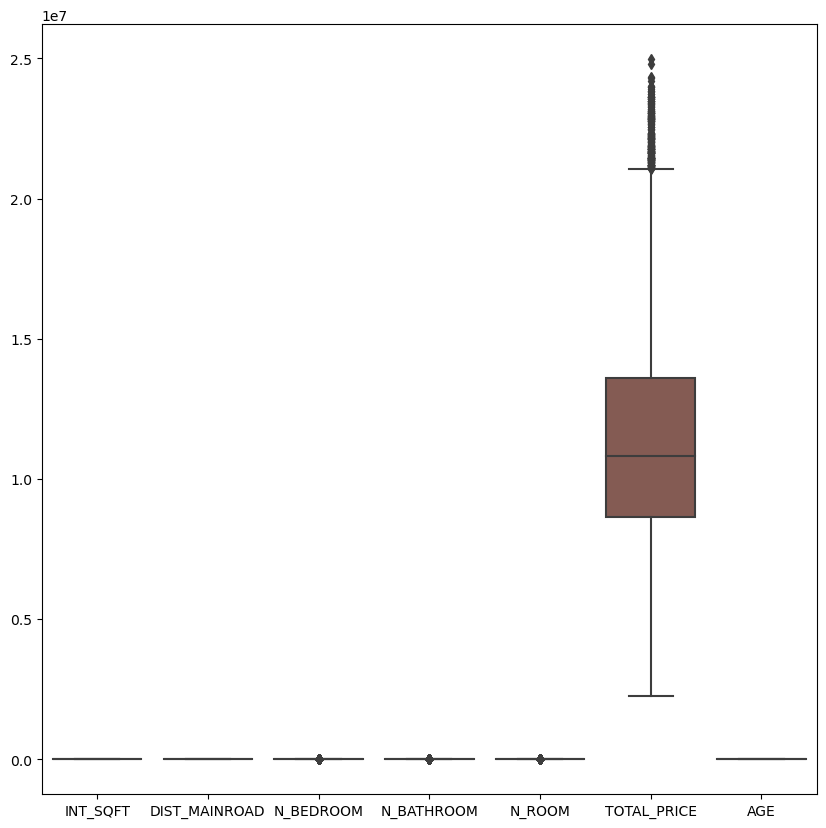

In [42]:
plt.figure(figsize=(10,10))
sns.boxplot(df_housing)

In [43]:
#column "TOTAL_PRICE" have the outliers treat them through IQR method

In [44]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [45]:
for i in ["TOTAL_PRICE","N_ROOM","N_BATHROOM","N_BEDROOM"]:
    lr,ur=remove_outlier(df_housing[i])
    df_housing[i]=np.where(df_housing[i]> ur,ur,df_housing[i])
    df_housing[i]=np.where(df_housing[i]<lr,lr,df_housing[i])

<Axes: >

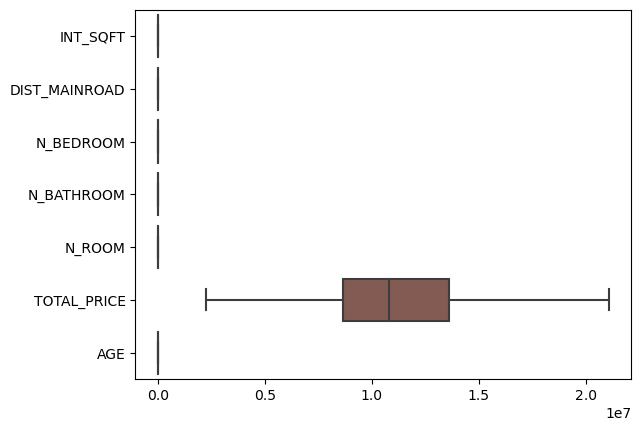

In [46]:

sns.boxplot(data=df_housing,orient="h")

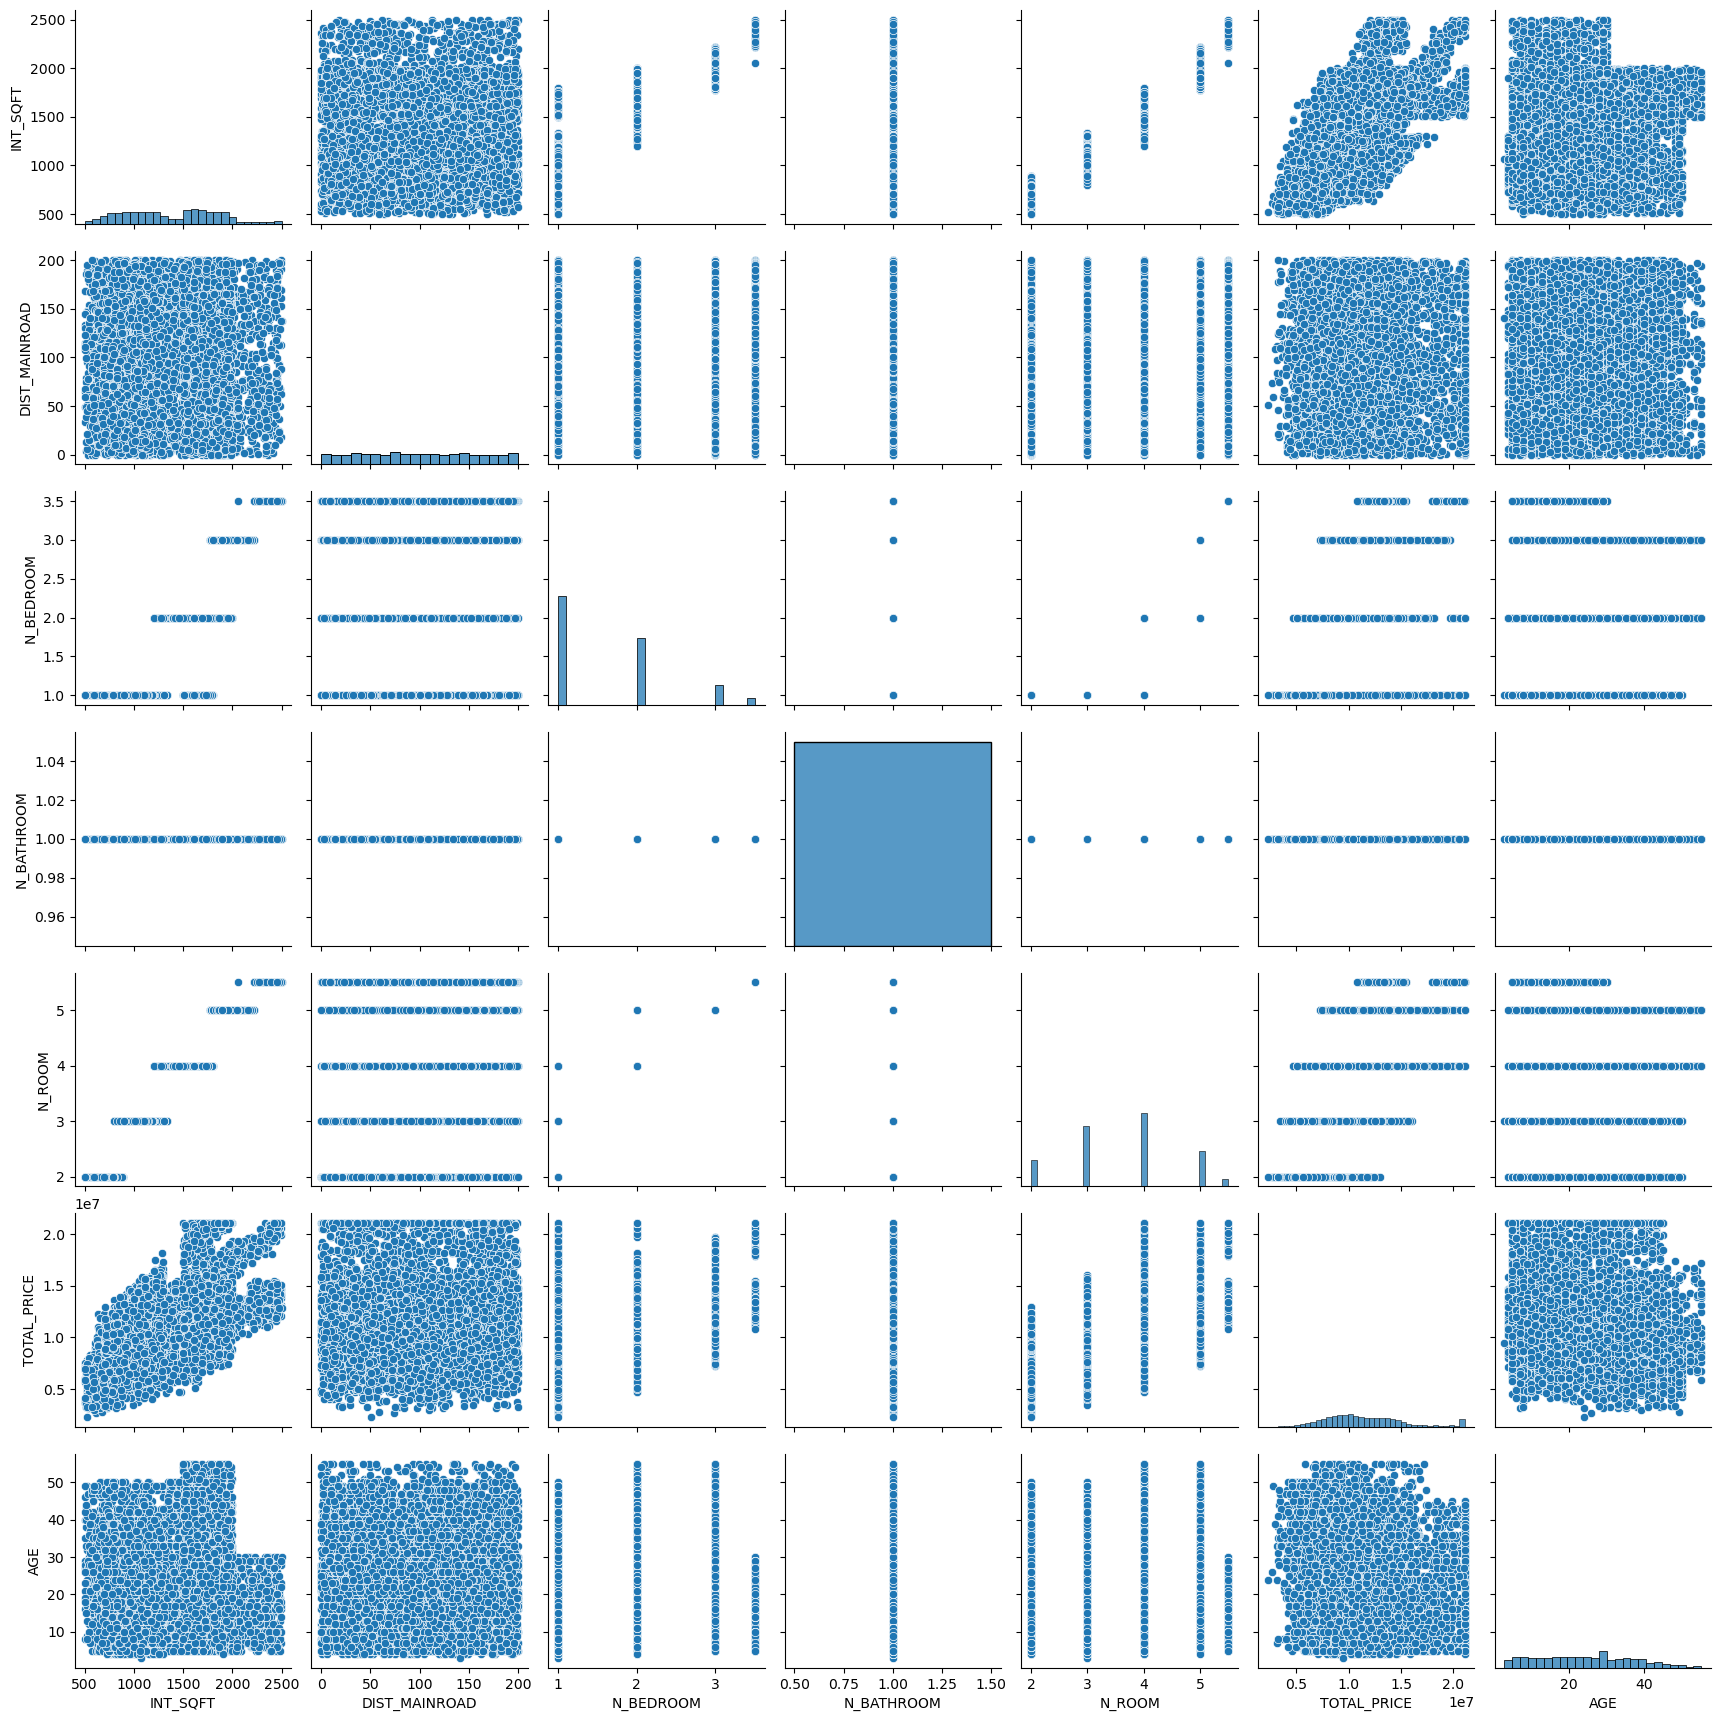

In [47]:
sns.pairplot(df_housing)

In [48]:
df_housing.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,TOTAL_PRICE,AGE
INT_SQFT,1.000000,0.001973,0.786299,NaN,0.948015,0.625304,-0.012273
DIST_MAINROAD,0.001973,1.000000,-0.003709,NaN,0.001529,0.017823,-0.003325
N_BEDROOM,0.786299,-0.003709,1.000000,NaN,0.827163,0.345586,-0.035362
N_BATHROOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N_ROOM,0.948015,0.001529,0.827163,NaN,1.000000,0.618590,-0.024295
TOTAL_PRICE,0.625304,0.017823,0.345586,NaN,0.618590,1.000000,-0.120334
AGE,-0.012273,-0.003325,-0.035362,NaN,-0.024295,-0.120334,1.000000


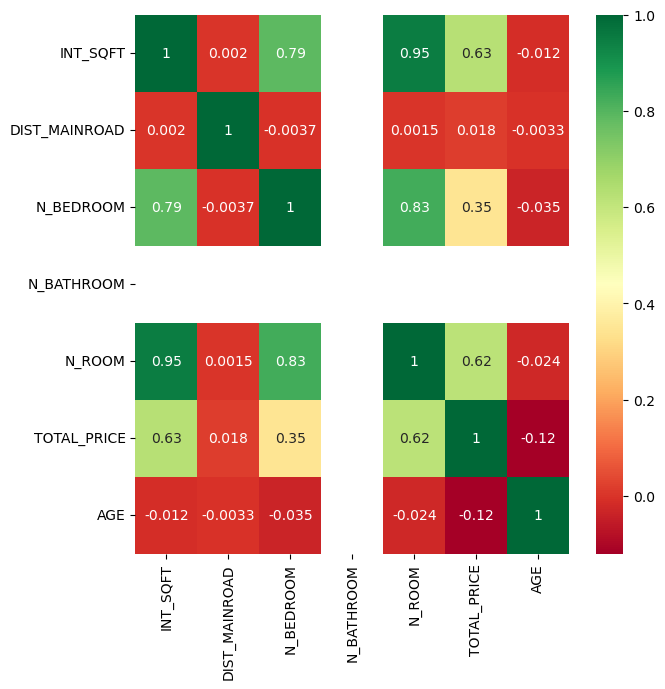

In [49]:
#get correlations of selected features in dataset
corrmat = df_housing.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(7,7))
#plot heat map
g=sns.heatmap(df_housing[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [50]:
#convert the catagorical column into numerical by using get_dummies(OnehotEncoding)

In [51]:
df_dummy=pd.get_dummies(df_housing[['AREA','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET']],drop_first=True)

In [52]:
df_dummy

,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,PARK_FACIL_Yes,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,STREET_No Access,STREET_Paved
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1
4,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0
7105,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0
7106,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7107,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1


In [53]:
df1_housing=pd.concat([df_housing,df_dummy],axis=1)

In [54]:
df1=df1_housing.copy()

In [55]:
df1_housing.drop(['PRT_ID','AREA','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE'],axis=1,inplace=True)

In [56]:
df1_housing

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,TOTAL_PRICE,AGE,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,...,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,PARK_FACIL_Yes,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,STREET_No Access,STREET_Paved
0,1004,131,1.0,1.0,3.0,8124400.0,44,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1986,26,2.0,1.0,5.0,21069144.5,11,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,909,70,1.0,1.0,3.0,13672408.0,20,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1855,14,3.0,1.0,5.0,10063653.0,22,0,0,0,...,1,0,0,0,0,1,0,1,0,1
4,1226,84,1.0,1.0,3.0,7717313.0,30,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2.0,5668827.0,49,0,0,0,...,0,0,0,0,0,1,1,0,1,0
7105,1897,52,3.0,1.0,5.0,11370222.0,9,0,0,0,...,1,0,0,1,0,1,0,1,1,0
7106,1614,152,2.0,1.0,4.0,8835792.0,28,0,0,0,...,0,1,0,0,1,0,0,1,0,0
7107,787,40,1.0,1.0,2.0,9051448.0,32,0,0,0,...,0,0,1,1,0,0,1,0,0,1


# MODEL BUILDING

In [57]:
X=df1_housing.drop(["TOTAL_PRICE"],axis=1)
y=df1_housing["TOTAL_PRICE"]

In [58]:
X.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'AGE',
       'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam',
       'AREA_T Nagar', 'AREA_Velachery', 'SALE_COND_AdjLand',
       'SALE_COND_Family', 'SALE_COND_Normal Sale', 'SALE_COND_Partial',
       'PARK_FACIL_Yes', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'UTILITY_AVAIL_ELO', 'UTILITY_AVAIL_NoSeWa', 'STREET_No Access',
       'STREET_Paved'],
      dtype='object')

In [94]:
X.shape

(7103, 23)

In [95]:
y.shape

(7103,)

In [96]:
sc=StandardScaler()

In [97]:
X_scaled=sc.fit_transform(X)

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=1)

In [99]:
X_train.shape

(4972, 23)

In [100]:
X_test.shape

(2131, 23)

# Model Selection

In [247]:
model_params={
    'linear':{
        'model':LinearRegression(),
        'params': {
                'fit_intercept': [True, False]
        }
    },
    
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
        }
    },
    'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
    },
      'random_forest':{
         'model':RandomForestRegressor(),
         'params':{
             'criterion':['squared_error','friedman_mse'],
             'n_estimators':[1,5,10]
             
}
         },
    'k_neighbor':{
         'model':KNeighborsRegressor(),
         'params':{
             'n_neighbors':[5,10],
             'weights':['uniform','distance'],
             'metric':['minkowski']
             
             
}
         }
    
          }

In [264]:
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [265]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df.sort_values(["best_score"],ascending=False)

,model,best_score,best_params
3,random_forest,0.931729,"{'criterion': 'squared_error', 'n_estimators':..."
2,lasso,0.920914,"{'alpha': 2, 'selection': 'random'}"
0,linear,0.920914,{'fit_intercept': True}
1,decision_tree,0.891207,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
4,k_neighbor,0.837678,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei..."


From hyperparameter tuning and model performance random forest model give better best_score

# Random Forest Regressor Model

In [101]:
rf=RandomForestRegressor(criterion='squared_error',n_estimators=5)

In [102]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5)

In [103]:
x_pred=rf.predict(X_train)

In [104]:
y_pred=rf.predict(X_test)

In [ ]:
# Metrics Evaluation for Random Forest Regressor

In [106]:
metrics.mean_squared_error(y_test,y_pred)

1119964077609.0432

In [110]:
metrics.mean_absolute_error(y_test, y_pred)

836578.7027686532

In [107]:
print(metrics.r2_score(y_test,y_pred))

0.9268048239234796


In [111]:
metrics.mean_squared_error(y_train,x_pred)

229667951937.3729

In [125]:
metrics.mean_absolute_error(y_train,x_pred)

334765.9933628319

In [109]:
print(metrics.r2_score(y_train,x_pred))

0.9853552912138223


# Linear Regression Model

In [119]:
lr=LinearRegression()

In [113]:
lr.fit(X_train,y_train)

LinearRegression()

In [114]:
x1_pred=lr.predict(X_train)

In [117]:
y1_pred=lr.predict(X_test)

# Metrics Evaluation for Linear Regression

In [118]:
metrics.mean_squared_error(y_test,y1_pred)

1336432511819.5417

In [122]:
metrics.mean_absolute_error(y_test, y1_pred)

930017.2067172055

In [123]:
print(metrics.r2_score(y_test,y1_pred))

0.9126575441367283


In [124]:
metrics.mean_squared_error(y_train,x1_pred)

1292185101722.9502

In [126]:
metrics.mean_absolute_error(y_train,x1_pred)

910628.0404807384

In [127]:
print(metrics.r2_score(y_train,x1_pred))

0.9176042005297705


Comparing RandomForestRegressor Model and LinearRegression Model,RandomForestRegressor Model Gives Better R2 score

# Output of Price Actual and Price Prediction

In [54]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df1.merge(out,left_index=True,right_index=True)

In [55]:
result[['PRT_ID','AREA','Price_actual','Price_pred']].sample(20)

,PRT_ID,AREA,Price_actual,Price_pred
2286,P03253,Velachery,12323198,9917735.6
969,P07281,KK Nagar,17843149,17397750.4
3138,P02276,Chrompet,10885617,10628653.2
2065,P06590,Anna Nagar,22892240,22484956.2
5364,P05965,Chrompet,11331515,11538953.6
5508,P03852,Karapakkam,7329584,9239921.8
4524,P09523,Adyar,6789448,6744828.8
1057,P00180,Anna Nagar,12746253,11786572.2
308,P06041,Karapakkam,8166250,9103526.6
4331,P08065,Chrompet,10007991,9371545.4


# Save the model

In [1]:
import pickle

In [128]:
import pickle
with open(r'C:\Users\SKAN\Desktop\Raajee\chennai_housing\model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [137]:
with open(r'C:\Users\SKAN\Desktop\Raajee\chennai_housing\scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

In [129]:
#load the saved model and check the metrics

In [130]:
with open(r'C:\Users\SKAN\Desktop\Raajee\chennai_housing\model.pkl', 'rb') as file:
    plr= pickle.load(file)

In [133]:
y2_pred=plr.predict(X_test)

In [134]:
print(metrics.r2_score(y_test,y2_pred))

0.9268048239234796


In [135]:
x2_pred=plr.predict(X_train)

In [136]:
print(metrics.r2_score(y_train,x2_pred))

0.9853552912138223
